In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
gd = pd.read_csv("googleplaystore.csv")
gd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
gd[gd.Rating >5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
#Removing because app store does not have ratings more than 5, so this is cleaning of junked data
gd.drop([10472], inplace =True)

In [19]:
#Remove data that is 90% empty
threshold = len(gd)* 0.1
threshold
gd.dropna(thresh = threshold, axis =1, inplace =True)

1084.0

In [21]:
def impute_median(series):
    return series.fillna(series.median()) 

In [23]:
gd.Rating = gd['Rating'].transform(impute_median)

In [26]:
gd['Type'].fillna(str(gd['Type'].mode().values[0]), inplace = True)
gd['Current Ver'].fillna(str(gd['Current Ver'].mode().values[0]), inplace = True)
gd['Android Ver'].fillna(str(gd['Android Ver'].mode().values[0]), inplace = True)

In [28]:
#Convert Values into appropriate Datatypes
gd['Price'] = gd['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
gd['Price'] = gd['Price'].apply(lambda x: float(x))
gd['Reviews'] = pd.to_numeric(gd['Reviews'], errors ='coerce')

In [29]:
gd['Installs'] = gd['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
gd['Installs'] = gd['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
gd['Installs'] = gd['Installs'].apply(lambda x: float(x))

In [41]:
grp = gd.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

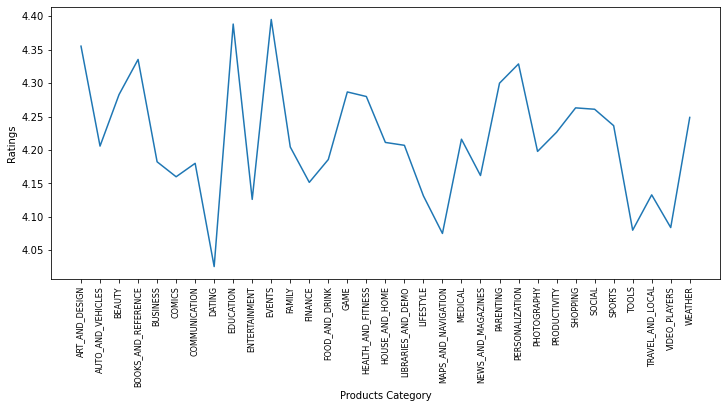

In [55]:
%matplotlib inline
plt.figure(figsize=(12, 5))
plt.plot(x)
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Ratings')
plt.xlabel('Products Category')
plt.show()

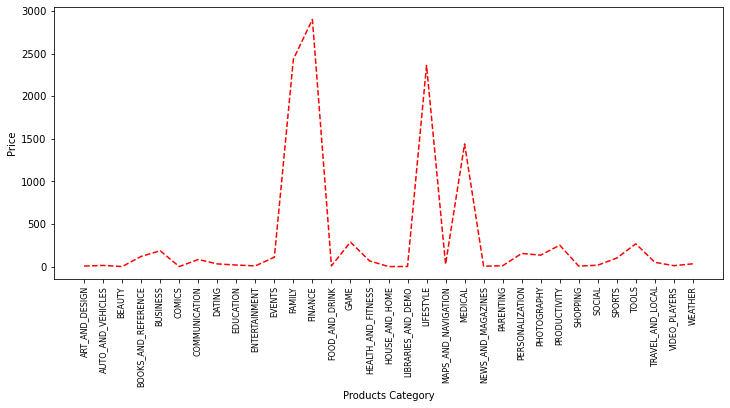

In [56]:
plt.figure(figsize=(12, 5))
plt.plot(y, 'r--')
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Price')
plt.xlabel('Products Category')
plt.show()

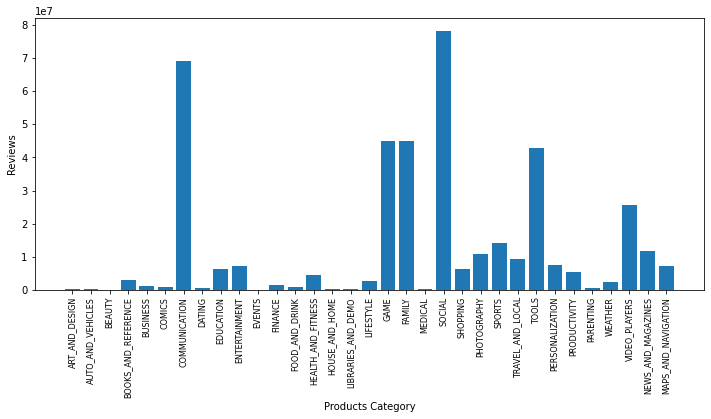

In [69]:
plt.figure(figsize=(12, 5))
plt.bar(gd['Category'], gd['Reviews'])
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Reviews')
plt.xlabel('Products Category')
plt.show()

In [ ]:
#I would like to thank Divya Thakur - Based on here Youtube video I was able to do this. 
#Here is her link https://www.youtube.com/watch?v=exqjWW3_BTY